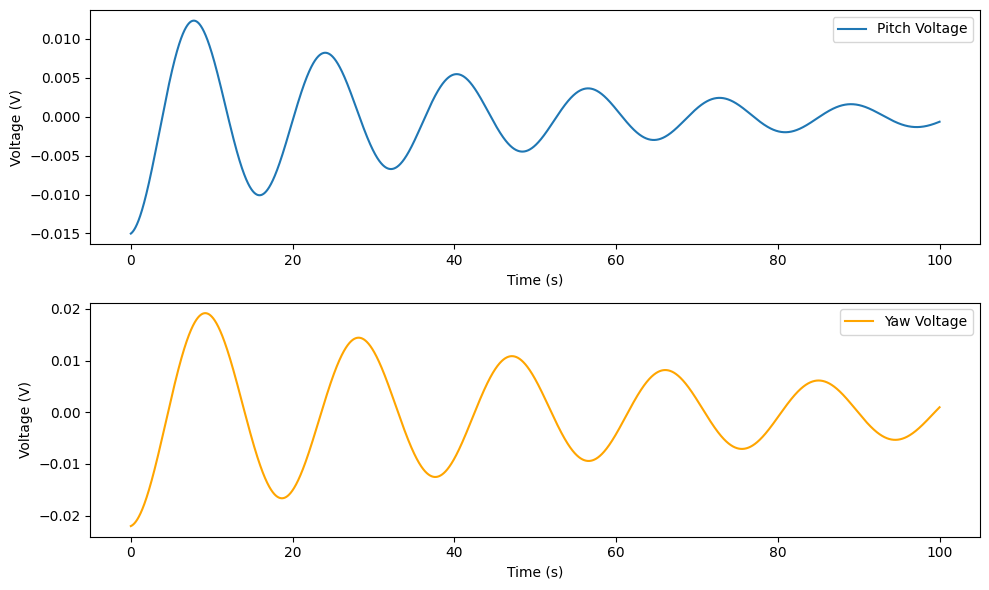

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and initial conditions
Kp_pitch, Ki_pitch, Kd_pitch = 0.1, 0.01, 0.05
Kp_yaw, Ki_yaw, Kd_yaw = 0.08, 0.005, 0.03
dt = 0.01  # Time step (adjust as needed)
duration = 100  # Simulation duration (seconds)

# Initialize state variables
theta, psi = 0.1, 0.2  # Initial pitch and yaw angles (radians)
theta_dot, psi_dot = 0.0, 0.0  # Initial angular rates (rad/s)

# Lists to store data
time_steps = np.arange(0, duration, dt)
pitch_voltages, yaw_voltages = [], []

# Simulate the system
for t in time_steps:
    # Compute errors
    e_pitch = 0 - theta
    e_yaw = 0 - psi

    # Compute control inputs
    V_pitch = Kp_pitch * e_pitch + Ki_pitch * np.sum(e_pitch) * dt + Kd_pitch * (e_pitch - theta_dot)
    V_yaw = Kp_yaw * e_yaw + Ki_yaw * np.sum(e_yaw) * dt + Kd_yaw * (e_yaw - psi_dot)

    # Update dynamics (simplified model)
    theta_dot += V_pitch * dt
    psi_dot += V_yaw * dt
    theta += theta_dot * dt
    psi += psi_dot * dt

    # Store voltages
    pitch_voltages.append(V_pitch)
    yaw_voltages.append(V_yaw)

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_steps, pitch_voltages, label="Pitch Voltage")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_steps, yaw_voltages, label="Yaw Voltage", color="orange")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()

plt.tight_layout()
plt.show()
